fit bottom_up
sigma 7.224097899718043
i 5405 (linkage - initial non zero pair)
----- SE merge phase 0 True start, individuals:  1000 , leaves  1000
6405
----- SE merge phase 0 end, individuals 0 , leaves  26
i 20005 merge phase
i 20031 merge phase update leaves states
----- SE binary merge 1
i 20656 binary_combine
N 1000 i 20656
build tree time 1.6511292457580566
se cost
[       nan 9.95556436 9.17326247 8.60480504 8.61458488 8.62801543
 8.66089322 8.67267154 8.70733321 8.71897988 8.76488816]
8.604805036507548
--------------------------
The best k is: 3
SEAT optimal clustering result: 
 [2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 2, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 0, 1, 2, 2, 1, 2, 2, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 2, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0, 2, 0, 0, 0, 1, 2, 0, 0, 

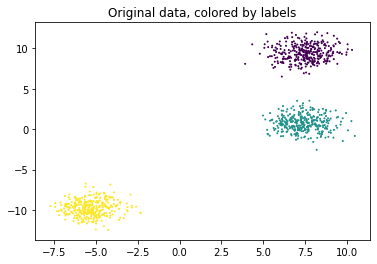

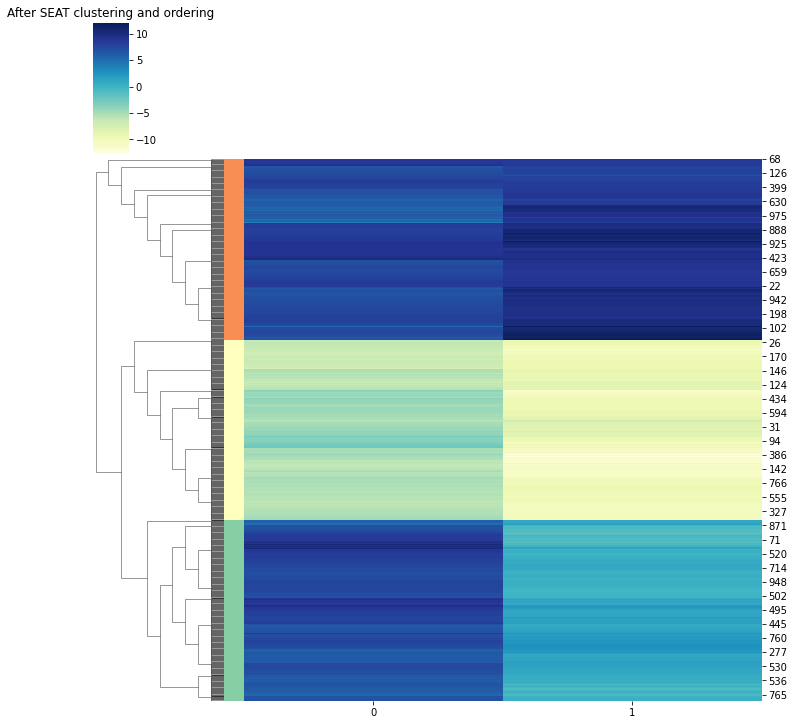

In [46]:
from sklearn.neighbors import kneighbors_graph
import numpy as np
import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt

from pyseat.SEAT import SEAT


X, labels = datasets.make_blobs(n_samples=1000, random_state=8)

seat = SEAT(affinity="gaussian_kernel",
            sparsification="knn_neighbors",
            objective="SE",
            strategy="bottom_up")
seat.fit_predict(X)

# seat output
print('--------------------------')
print('The best k is:', seat.optimal_k)
print('SEAT optimal clustering result: \n', seat.labels_)
print('Candicate k for tuning: \n', seat.ks)
print('SE score for tuning k: \n', seat.se_scores)
print('SEAT clustering result for different k: \n', seat.ks_clusters)
print('SEAT club labels: \n', seat.clubs)
print('SEAT orders: \n', seat.order)


plt.title('Original data, colored by labels')
plt.scatter(X[:, 0], X[:, 1], 
                s=1,
                c=labels
               )
plt.show()

# plot the structure entropy hierarchy and clustering result
label = seat.labels_
label_colors = dict(zip(set(label), sns.color_palette('Spectral', len(set(label)))))
label_colors = [label_colors[l] for l in label]

sns.clustermap(X,
                   row_linkage=seat.Z_,
                   col_cluster=False,
                   row_colors=label_colors,
                   cmap='YlGnBu')
plt.title("After SEAT clustering and ordering")
plt.show()

spread = 1, min_dist = 0.1, a = 1.576943460405378, b = 0.8950608781227859
epoch=0	loss_0=1669210.0	loss_1=1512096.5	loss_2=244264.46875	loss=3425571.0	update_loss=3425571.0	
epoch=100	loss_0=116359.9609375	loss_1=111555.203125	loss_2=307366.78125	loss=535281.9375	update_loss=535281.9375	
epoch=199	loss_0=116541.90625	loss_1=108358.0703125	loss_2=304308.375	loss=529208.375	update_loss=529208.375	
SEAT hierachical embedding:  (1000, 2)


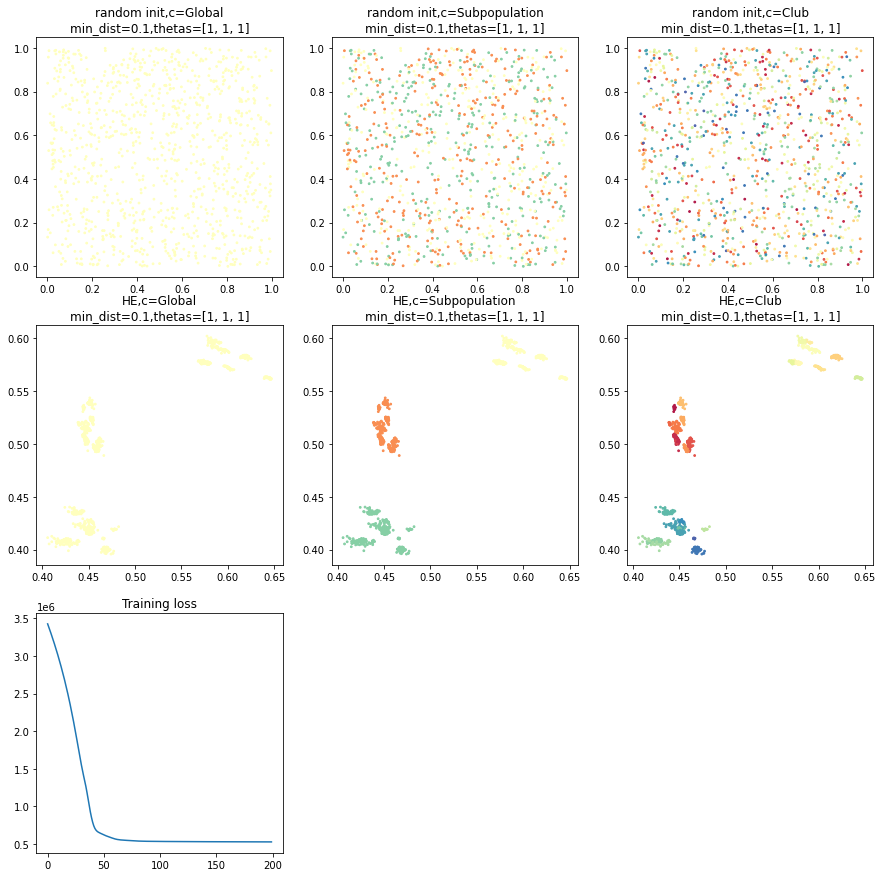

In [47]:
import pandas as pd
from pyseat.HierachicalEmbedding import HierachicalEmbedding

y = pd.DataFrame({
    'Global': [1]*len(seat.labels_),
    'Subpopulation': seat.labels_,
    'Club': seat.clubs
})

HE = HierachicalEmbedding(device='cpu', n_epochs=200, init='random', random_state=0,
                          min_dist=0.1,
                          n_components=2)  

embed = HE.fit_transform(seat.aff_m, y, thetas=[1, 1, 1])
print('SEAT hierachical embedding: ', embed.shape)
HE.viz_fit()